In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
flightData = pd.read_csv("/content/drive/MyDrive/IDMP_project/IDMPProject/FlightData.csv")

In [ ]:
flight_data_2020 = pd.read_csv("/content/drive/MyDrive/IDMP_project/IDMPProject/2020_data.csv")

In [ ]:
flight_data_2021 = pd.read_csv("/content/drive/MyDrive/IDMP_project/IDMPProject/2021_data.csv")

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
flight_data_2022 = pd.read_csv("/content/drive/MyDrive/IDMP_project/IDMPProject/2022_data.csv")

In [ ]:
selectedColumns = ["PASSENGERS",
"AIRLINE_ID",
"CARRIER_NAME",
"ORIGIN",
"ORIGIN_CITY_NAME",
"ORIGIN_STATE_ABR",
"ORIGIN_STATE_NM",
"DEST_CITY_NAME",
"DEST_STATE_ABR",
"DEST_STATE_NM",
"YEAR",
"MONTH"]
flight_data_2020_neededColumns = flight_data_2020.loc[:, selectedColumns]

In [ ]:
flight_data_2020_neededColumns.rename(columns = {'PASSENGERS' : 'Sum_PASSENGERS'}, inplace = True)

In [ ]:
filtered2020Data = (flight_data_2020_neededColumns['MONTH'] > 10)

In [ ]:
flightData2020final = flight_data_2020_neededColumns[filtered2020Data]

In [ ]:
flight_data_2021_neededColumns = flight_data_2021.loc[:, selectedColumns]
flight_data_2021_neededColumns.rename(columns = {'PASSENGERS' : 'Sum_PASSENGERS'}, inplace = True)

In [ ]:
flight_data_2022_neededColumns = flight_data_2022.loc[:, selectedColumns]
flight_data_2022_neededColumns.rename(columns = {'PASSENGERS' : 'Sum_PASSENGERS'}, inplace = True)

In [ ]:
selectedColumnsDomestic = ["Sum_PASSENGERS",
"AIRLINE_ID",
"CARRIER_NAME",
"ORIGIN",
"ORIGIN_CITY_NAME",
"ORIGIN_STATE_ABR",
"ORIGIN_STATE_NM",
"DEST_CITY_NAME",
"DEST_STATE_ABR",
"DEST_STATE_NM",
"YEAR",
"MONTH"]
flightDataFinal = flightData.loc[:, selectedColumnsDomestic]

In [ ]:
flightDataFinalList = [flightData,filtered2020Data,flight_data_2021_neededColumns,flight_data_2022_neededColumns]
concatenatedDataFrameflight = pd.concat(flightDataFinalList)
concatenatedDataFrameflight = concatenatedDataFrameflight.loc[:,selectedColumnsDomestic]

In [ ]:
concatenatedDataFrameflight.to_csv('/content/drive/MyDrive/IDMP_project/IDMPProject/FlightDataFinal.csv',index = False)

In [32]:
covidData = pd.read_csv("/content/drive/MyDrive/IDMP_project/IDMPProject/CovidData.csv")


In [36]:
covidData["Year"] =  covidData["submission_date"].str[-4:]
covidData["Month"] = covidData["submission_date"].str[0:2]

In [79]:
selectedCovidDataColumnsForFlightAnalysis = ['state','new_case','new_death','Year','Month']
covidFlightData = covidData.loc[:,selectedCovidDataColumnsForFlightAnalysis]

In [80]:
covidFlightDataSummarized = covidFlightData.groupby(by = ['Year','Month','state'])['new_case'].max()

In [81]:
covidFlightDataSummarized=covidFlightDataSummarized.reset_index()

In [84]:
covidFlightDataSummarized

,Year,Month,state,new_case,Year_Month
0,2020,01,AK,0,202001
1,2020,01,AL,0,202001
2,2020,01,AR,0,202001
3,2020,01,AS,0,202001
4,2020,01,AZ,1,202001
...,...,...,...,...,...
2035,2022,10,VT,217,202210
2036,2022,10,WA,1275,202210
2037,2022,10,WI,2262,202210
2038,2022,10,WV,795,202210


In [83]:
covidFlightDataSummarized['Year_Month'] = covidFlightDataSummarized['Year'] + covidFlightDataSummarized['Month']

<BarContainer object of 2040 artists>

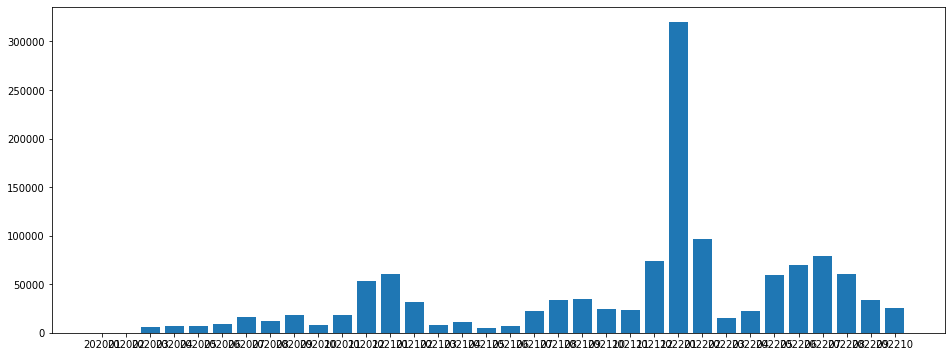

In [88]:
fig = plt.figure(figsize=(16, 6))
plt.bar(covidFlightDataSummarized.Year_Month, covidFlightDataSummarized.new_case)

In [89]:
for state, data in covidFlightDataSummarized:
    # Creating a new figure for each state
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plotting the data for the current state
    ax.plot(data['Year_month'], data['cases'])

    # Setting the title and axis labels for the plot
    ax.set_title(f'Cases in {state}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Cases')

    # Displaying the plot
    plt.show()

ValueError: ignored

In [113]:
#covidFlightDataSummarized.drop(columns=['Year','Month'],inplace = True)
covidFlightDataSummarized)


,state,new_case,Year_Month
0,AK,0,202001
1,AL,0,202001
2,AR,0,202001
3,AS,0,202001
4,AZ,1,202001
...,...,...,...
2035,VT,217,202210
2036,WA,1275,202210
2037,WI,2262,202210
2038,WV,795,202210


In [135]:
groups = covidFlightDataSummarized.groupby('state')

In [145]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [163]:
def plot_state(df, state):
    fig = px.bar(df[df['state'] == state], x='Year_Month', y='new_case', title=f'New Cases in {state}')
    fig.update_layout(title_x=0.5)
    return fig

In [170]:
states = covidFlightDataSummarized['state'].unique()

fig_dict = {state: plot_state(covidFlightDataSummarized, state) for state in states}
fig = go.Figure()

 #Add the first state's plot to the figure
for state in states:
    for trace in fig_dict[state]['data']:
        fig.add_trace(trace)

 #Define the dropdown menu
dropdown = {
   'method': 'update',
    'args': [{'visible': [False] * len(states)}, {'title': f'New Cases in {states[1]}'}]
}

buttons = [{'label': state, 'method': 'update', 'args': [{'visible': [s == state for s in states]}, {'title': f'New Cases in {state}'}]} for state in states]
buttons.insert(0, dropdown)

 #Update the layout with the dropdown menu
fig.update_layout({'updatemenus': [{'type': 'dropdown', 'showactive': True, 'active': 0, 'buttons': buttons}]})

fig.show()
